In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
from mpl_toolkits.mplot3d import axes3d, art3d

In [3]:
matplotlib.rcParams.update({'font.size': 11})

In [63]:
# mesteparten av koden her baserer seg på or-operator.py: https://gitlab.com/ntnu-tdat3025/ann/visualize/-/blob/master/or-operator.py?ref_type=heads
def sigmoid(t):
    return 1 / (1 + np.exp(-t))


class SigmoidModel:

    def __init__(self):
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return sigmoid(x @ self.W + self.b)
        
    # klarer ikke å plotte f() 
    def f_viz(self, x):
        return sigmoid((x @ self.W + self.b).detach())

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [67]:
model = SigmoidModel()

x_train = torch.tensor([[0.0], [1.0]])
y_train = torch.tensor([[1.0], [0.0]])

learning_rate = 0.5
epochs = 1000
# train
optimizer = torch.optim.SGD([model.b, model.W], lr=learning_rate)

for epoch in range(epochs):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

In [68]:
print(f"W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}")

W = tensor([[-9.1805]], requires_grad=True), b = tensor([[4.3850]], requires_grad=True), loss = 0.01030950527638197


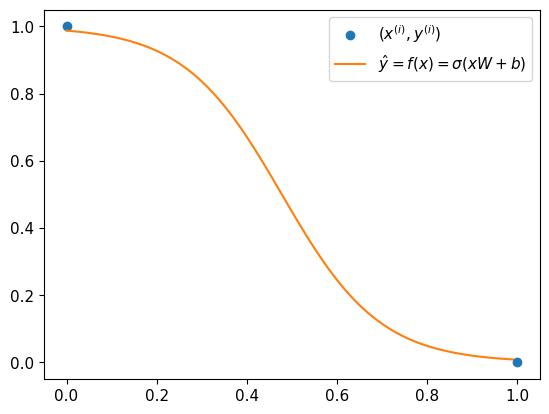

In [69]:
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
x = torch.arange(0.0, 1.0, 0.01).reshape(-1, 1)
plt.plot(x, model.f_viz(x), label='$\\hat y = f(x) = \sigma(xW + b)$')
plt.legend()
plt.show()

In [70]:
# mesteparten av koden her baserer seg på or-operator.py: https://gitlab.com/ntnu-tdat3025/ann/visualize/-/blob/master/or-operator.py?ref_type=heads

def sigmoid(t):
    return 1 / (1 + np.exp(-t))


class SigmoidModel:

    def __init__(self):
        self.W = torch.tensor([[0.0], [0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)

    def logits(self, x):
        return x @ self.W + self.b

    # Predictor
    def f(self, x):
        return sigmoid(x @ self.W + self.b)
        
    # klarer ikke å plotte f() 
    def f_viz(self, x):
        return sigmoid((x @ self.W + self.b).detach())

    # Uses Cross Entropy
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.logits(x), y)

In [78]:
# nand
model = SigmoidModel()

x_train = torch.tensor([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]])
y_train = torch.tensor([[1.0], [1.0], [1.0], [0.0]])

learning_rate = 0.5
epochs = 1000
# train
optimizer = torch.optim.SGD([model.b, model.W], lr=learning_rate)

for epoch in range(epochs):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

In [82]:
print(f"W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}")

W = tensor([[-6.0141],
        [-6.0141]], requires_grad=True), b = tensor([[9.1984]], requires_grad=True), loss = 0.03464927151799202


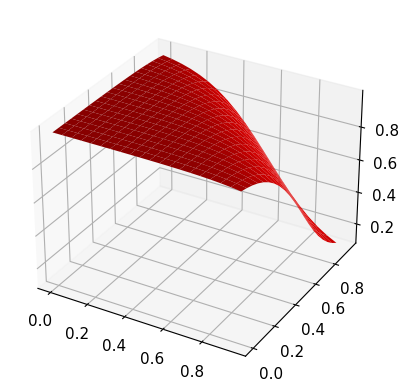

In [89]:
ax = plt.figure().add_subplot(projection="3d")

size = 20
x, y = torch.meshgrid(torch.arange(0, 1, 1 / size), torch.arange(0, 1, 1 / size))
z = torch.zeros([size, size])

for row in range(size):
    for col in range(size):
        z[row, col] = model.f_viz(torch.tensor([x[row, col], y[row, col]]))

ax.plot_surface(x, y, z, color="red")
plt.show()